In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


In [3]:
# Display a description of the dataset
stats = data.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
# Using data.loc to filter a pandas DataFrame
data.loc[[100, 200, 300],:]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
100,11594,7779,12144,3252,8035,3029
200,3067,13240,23127,3941,9959,731
300,16448,6243,6360,824,2662,2005


In [5]:
# Retrieve column names
# Alternative code:
# data.keys()
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [6]:
# Existing features
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

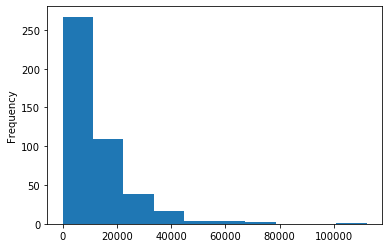

In [7]:
data["Fresh"].plot.hist()

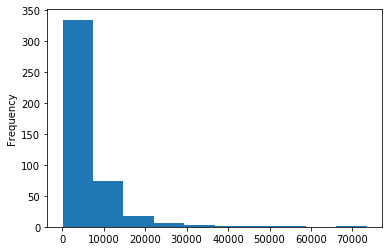

In [8]:
data["Milk"].plot.hist()

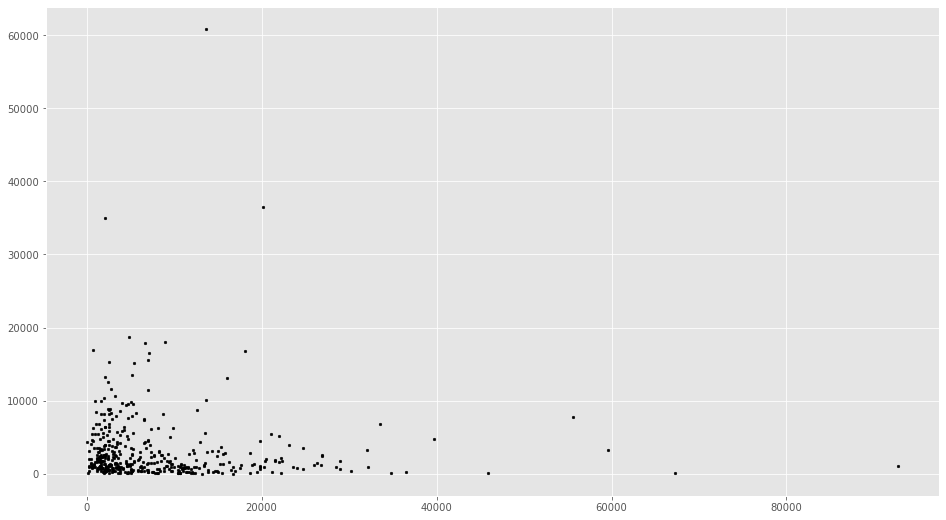

In [9]:
import matplotlib.pyplot as plt
x = data.iloc[:,:].values
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.scatter(x[:,2],x[:,3],c='black',s=7)

(414, 6)

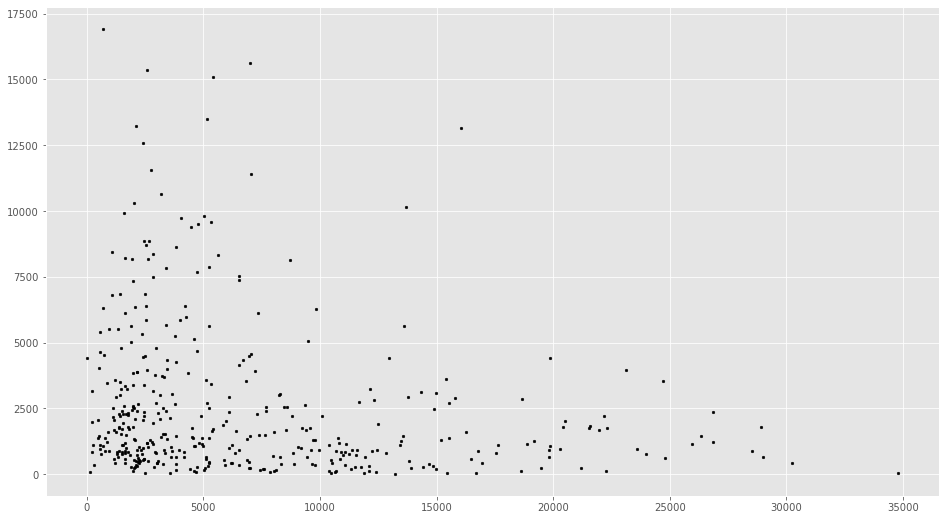

In [10]:
from scipy import stats
x = x[(np.abs(stats.zscore(x)) < 3).all(axis=1)]
display(x.shape)
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
plt.scatter(x[:,2],x[:,3],c='black',s=7)

[[ 4642.05434783 10351.83695652 16513.29347826  1389.29347826
   7136.58695652  1496.19565217]
 [25060.34343434  4000.26262626  5149.13131313  3771.44444444
   1127.15151515  1573.74747475]
 [ 6845.85201794  2998.11659193  3551.69058296  2486.41255605
    961.57399103   982.31390135]]


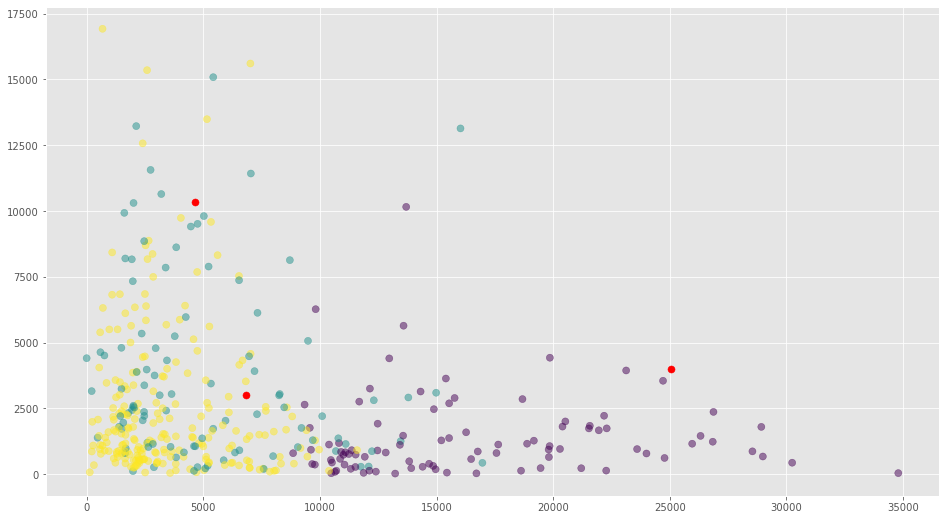

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(x[:,2],x[:,3], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

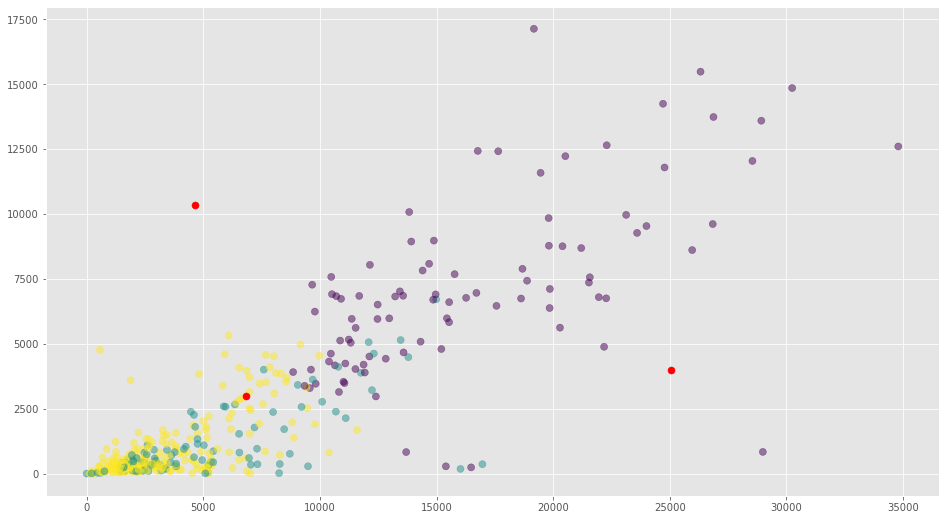

In [12]:
plt.scatter(x[:,2],x[:,4], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

,pca1,pca2
0,640.984204,3622.637339
1,-5131.536083,3396.877995
2,-5046.854754,1652.002938
3,4275.930025,-3408.513116
4,11146.335561,4703.760402
...,...,...
409,15288.739118,15945.353979
410,29314.665605,3197.043554
411,-6619.306944,27805.621508
412,1533.198135,-5519.134261


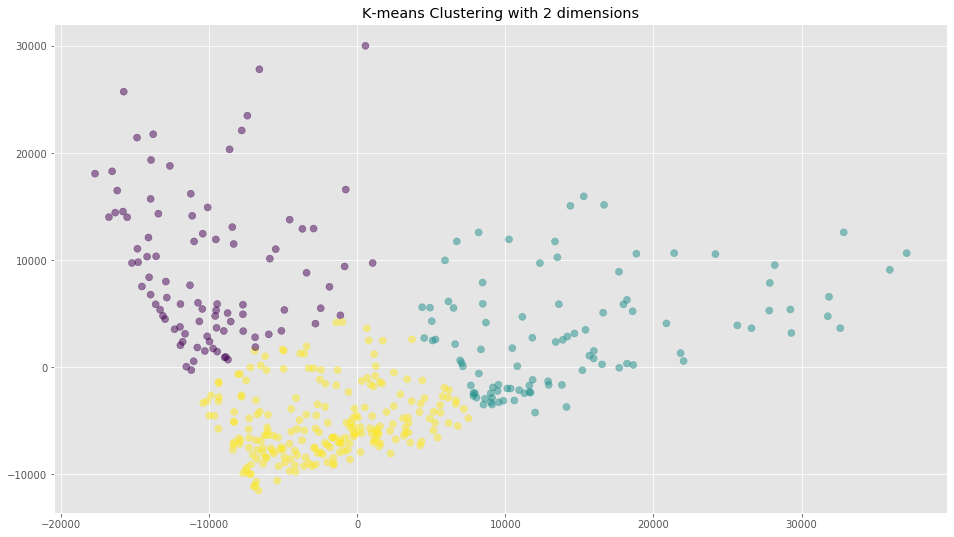

In [13]:
from sklearn.decomposition import PCA
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
display(results)
plt.scatter(x="pca1", y="pca2", c= kmeans.labels_.astype(float), s=50, alpha=0.5, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.43496765447880503
For n_clusters = 3 The average silhouette_score is : 0.4692667310160102
For n_clusters = 4 The average silhouette_score is : 0.4228640905651057
For n_clusters = 5 The average silhouette_score is : 0.42811039332668815
For n_clusters = 6 The average silhouette_score is : 0.4213664044866438
For n_clusters = 7 The average silhouette_score is : 0.39615984355302025
For n_clusters = 8 The average silhouette_score is : 0.4117744821873038
For n_clusters = 9 The average silhouette_score is : 0.4072183537974421


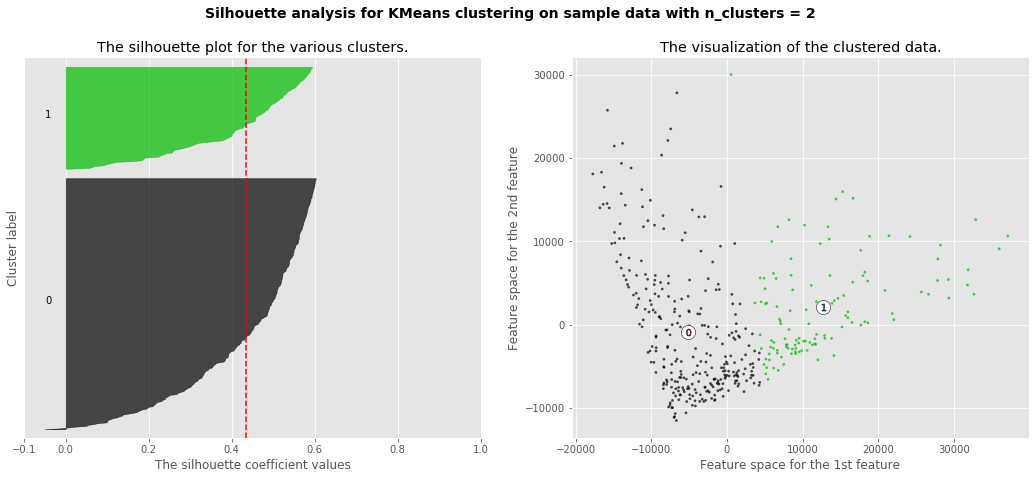

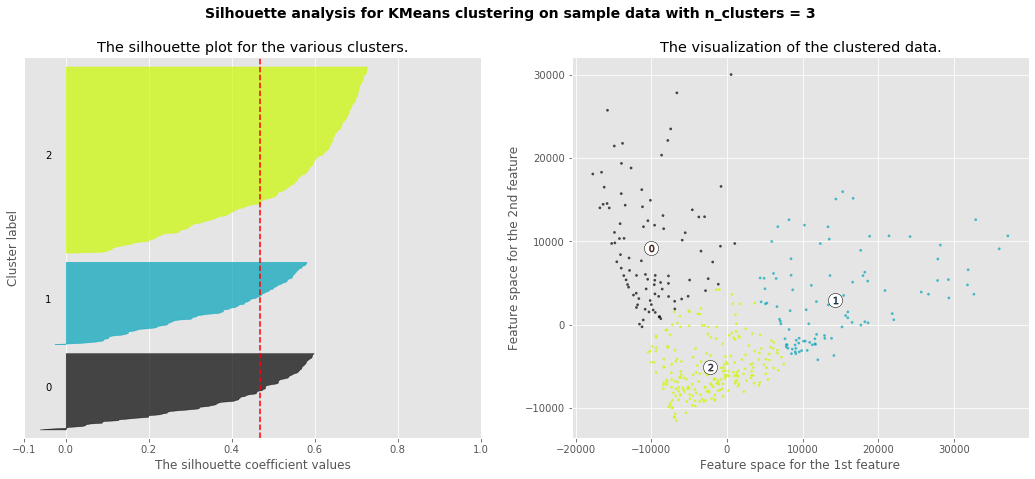

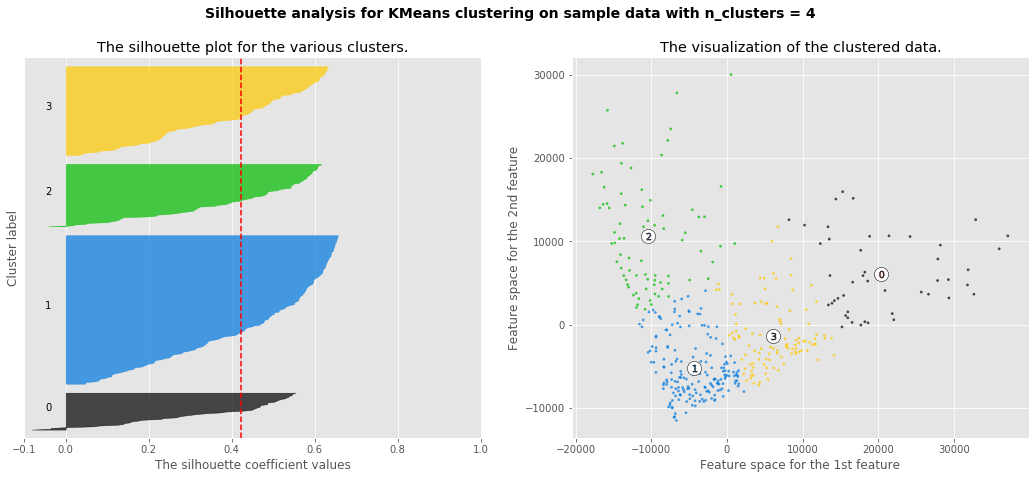

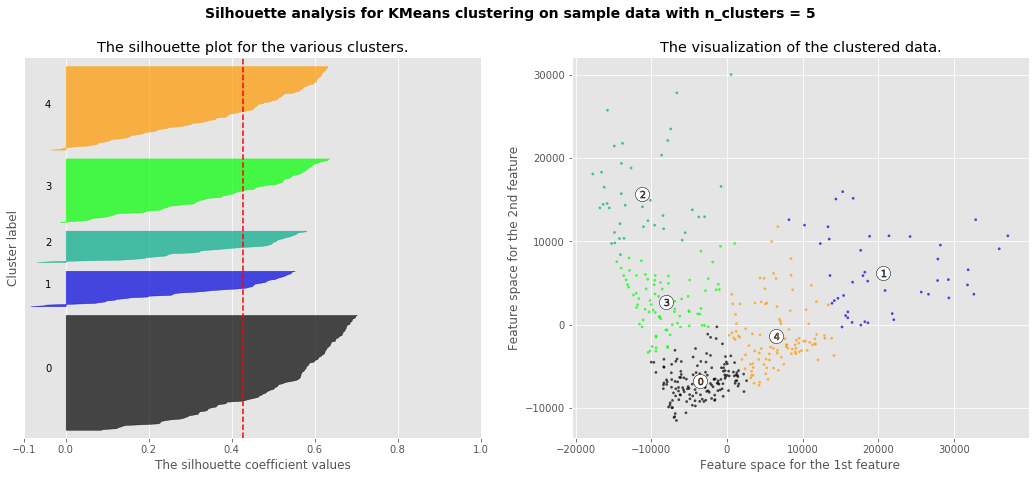

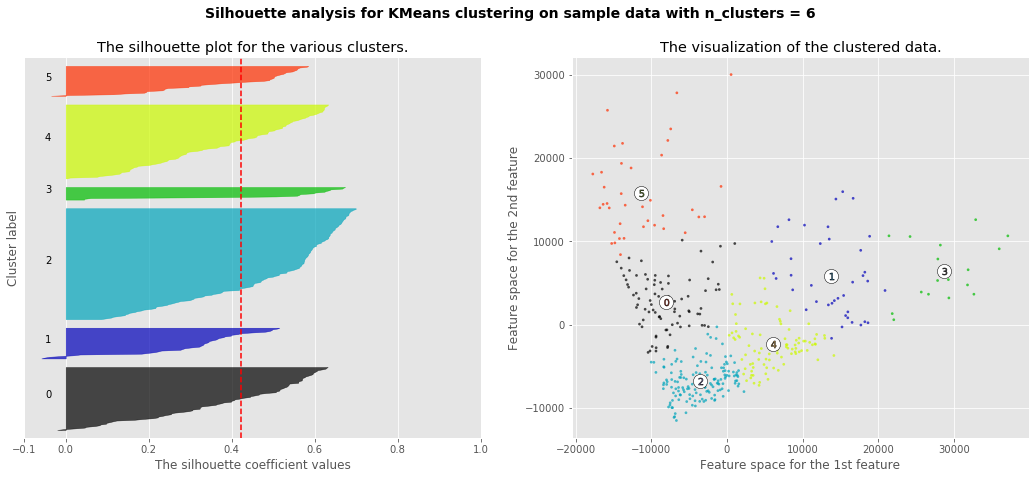

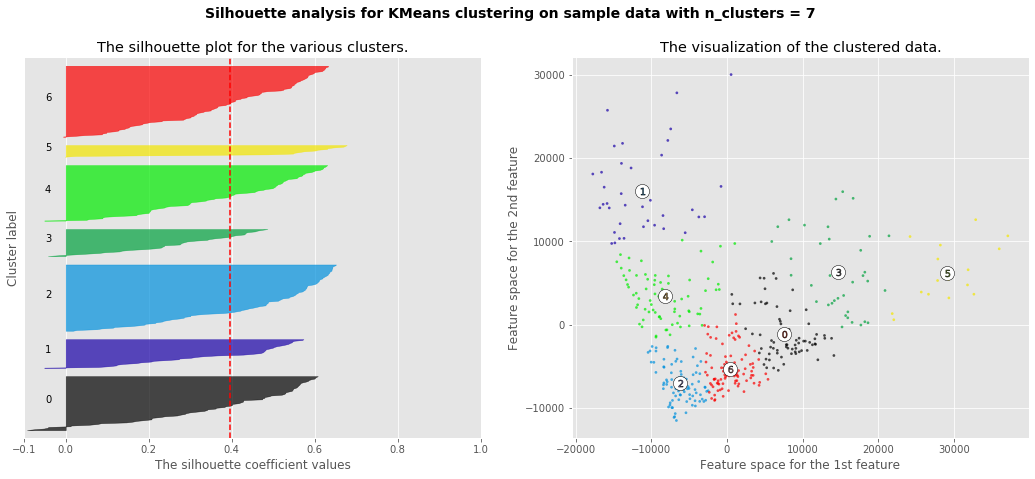

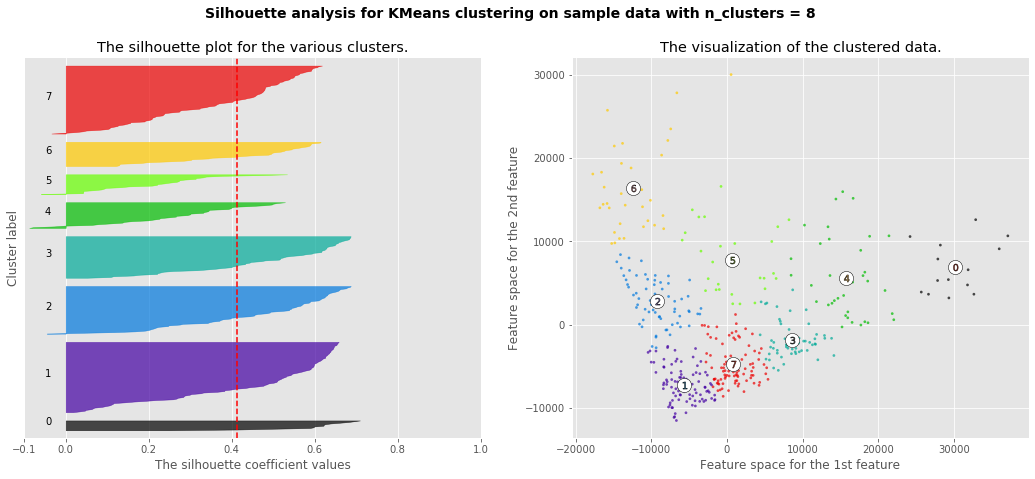

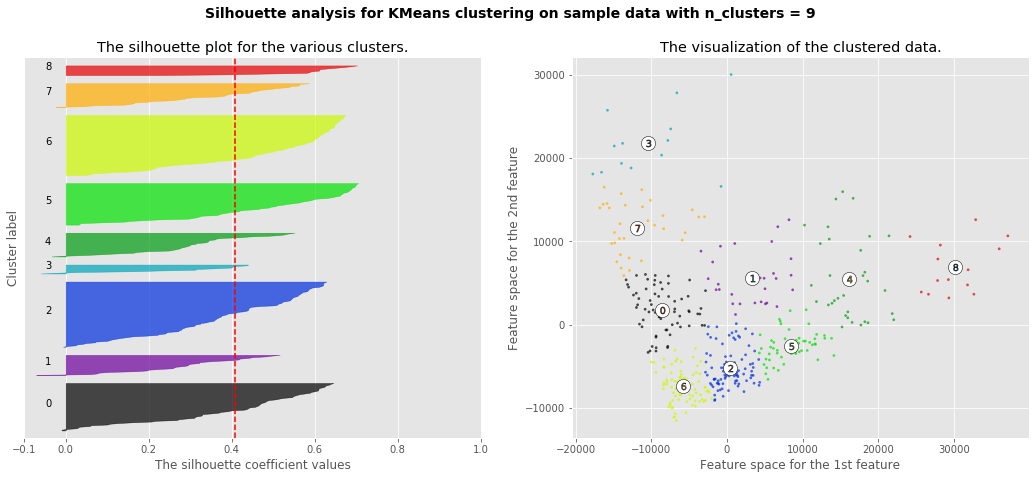

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
# silhouette analysis to choose number of K 
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]
X = results
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    reduced_data = PCA(n_components=2).fit_transform(x)
    results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
    
    ax2.scatter(results["pca1"], results["pca2"], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [15]:
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]], dtype=int64)